In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Load the preprocessed CSV
df = pd.read_csv('../data/citi_stock_data.csv', header=1, skiprows=[0])
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.rename(columns={df.columns[0]: 'Close_C'}, inplace=True)
df = df[['Close_C']]

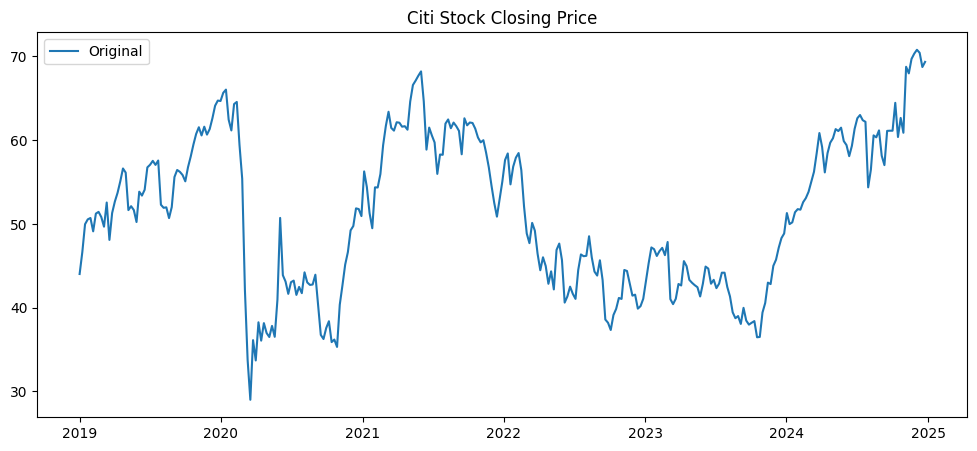

In [4]:
# Visualize original series
plt.figure(figsize=(12, 5))
plt.plot(df['Close_C'], label='Original')
plt.title('Citi Stock Closing Price')
plt.legend()
plt.show()

## Auto ARIMA Model Selection
We use `auto_arima()` to determine the best (p,d,q) parameters.

In [5]:
series = df['Close_C'].dropna()

model = auto_arima(series,
                   seasonal=False,
                   stepwise=True,
                   suppress_warnings=True,
                   trace=True,
                   error_action='ignore')

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1443.751, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3364.398, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2956.006, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1444.664, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1446.661, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1443.297, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1444.629, Time=0.07 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=1445.254, Time=0.10 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=1445.257, Time=0.08 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1444.582, Time=0.09 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=1445.144, Time=0.09 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=1447.673, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1436.756, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : 

## Train-Test Split
Train: 2019–2023  
Test: 2024 onward

In [6]:
train = series[:'2023']
test = series['2024':]

model.fit(train)

n_periods = len(test)
forecast = model.predict(n_periods=n_periods)
forecast_index = test.index
forecast_series = pd.Series(forecast, index=forecast_index)

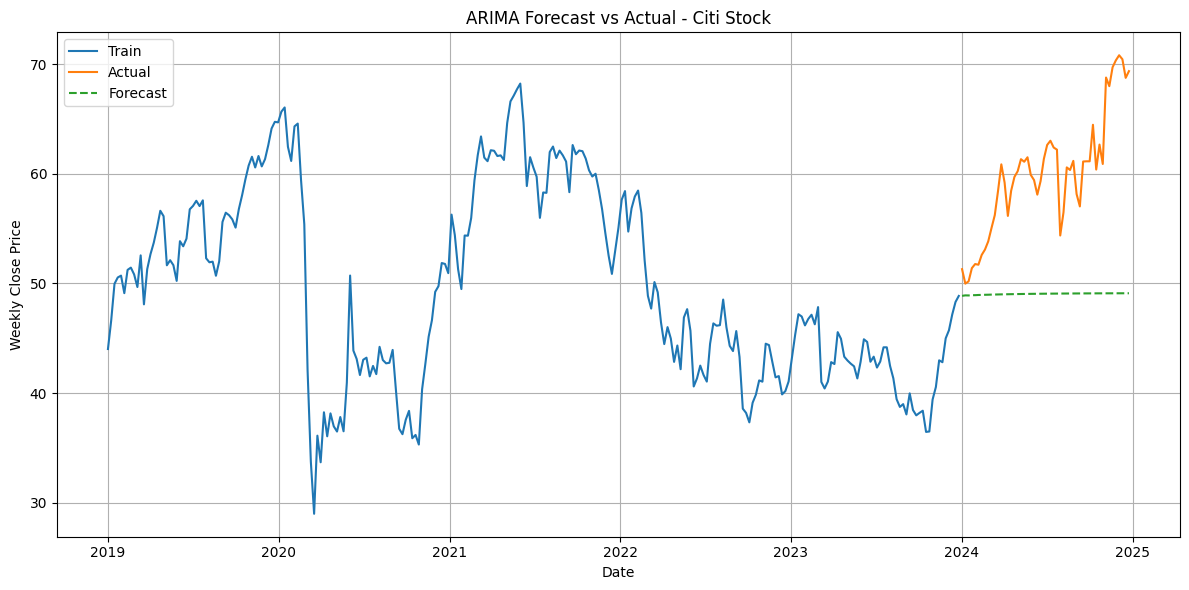

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Actual')
plt.plot(forecast_series, label='Forecast', linestyle='--')
plt.title('ARIMA Forecast vs Actual - Citi Stock')
plt.xlabel('Date')
plt.ylabel('Weekly Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../visuals/arima_forecast_vs_actual.png')
plt.show()

In [8]:
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 12.19
MAE: 10.93
